In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import imblearn as debarshi

In [46]:
df=pd.read_csv('data.csv')
df.head(3)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474


In [47]:
df = df.rename(columns={"Bankrupt?": "Bankrupt"})
df.head(3)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474


In [48]:
df.drop(df.columns[[94]],axis=1,inplace=True)
df.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [49]:
df_new=(df-df.mean())/df.std() 
df_new['Bankrupt'] = df['Bankrupt']
df_new.head(3)

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,...,-0.034269,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,...,-0.034269,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,...,-0.034269,-0.820449,-0.049487,-0.005984,-0.383670,-0.249802,0.679197,-0.062957,-0.125006,-0.621914


0    6599
1     220
Name: Bankrupt, dtype: int64


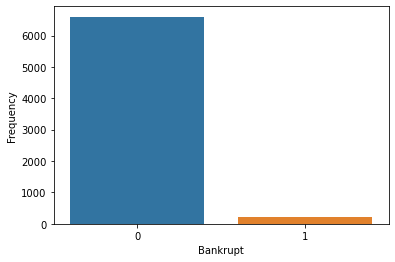

In [50]:
df_freq=pd.DataFrame(df_new['Bankrupt'].value_counts())
ax=sns.barplot(x=df_freq.index,y='Bankrupt',data=df_freq)
plt.xlabel('Bankrupt')
plt.ylabel('Frequency')
print(df_new['Bankrupt'].value_counts())

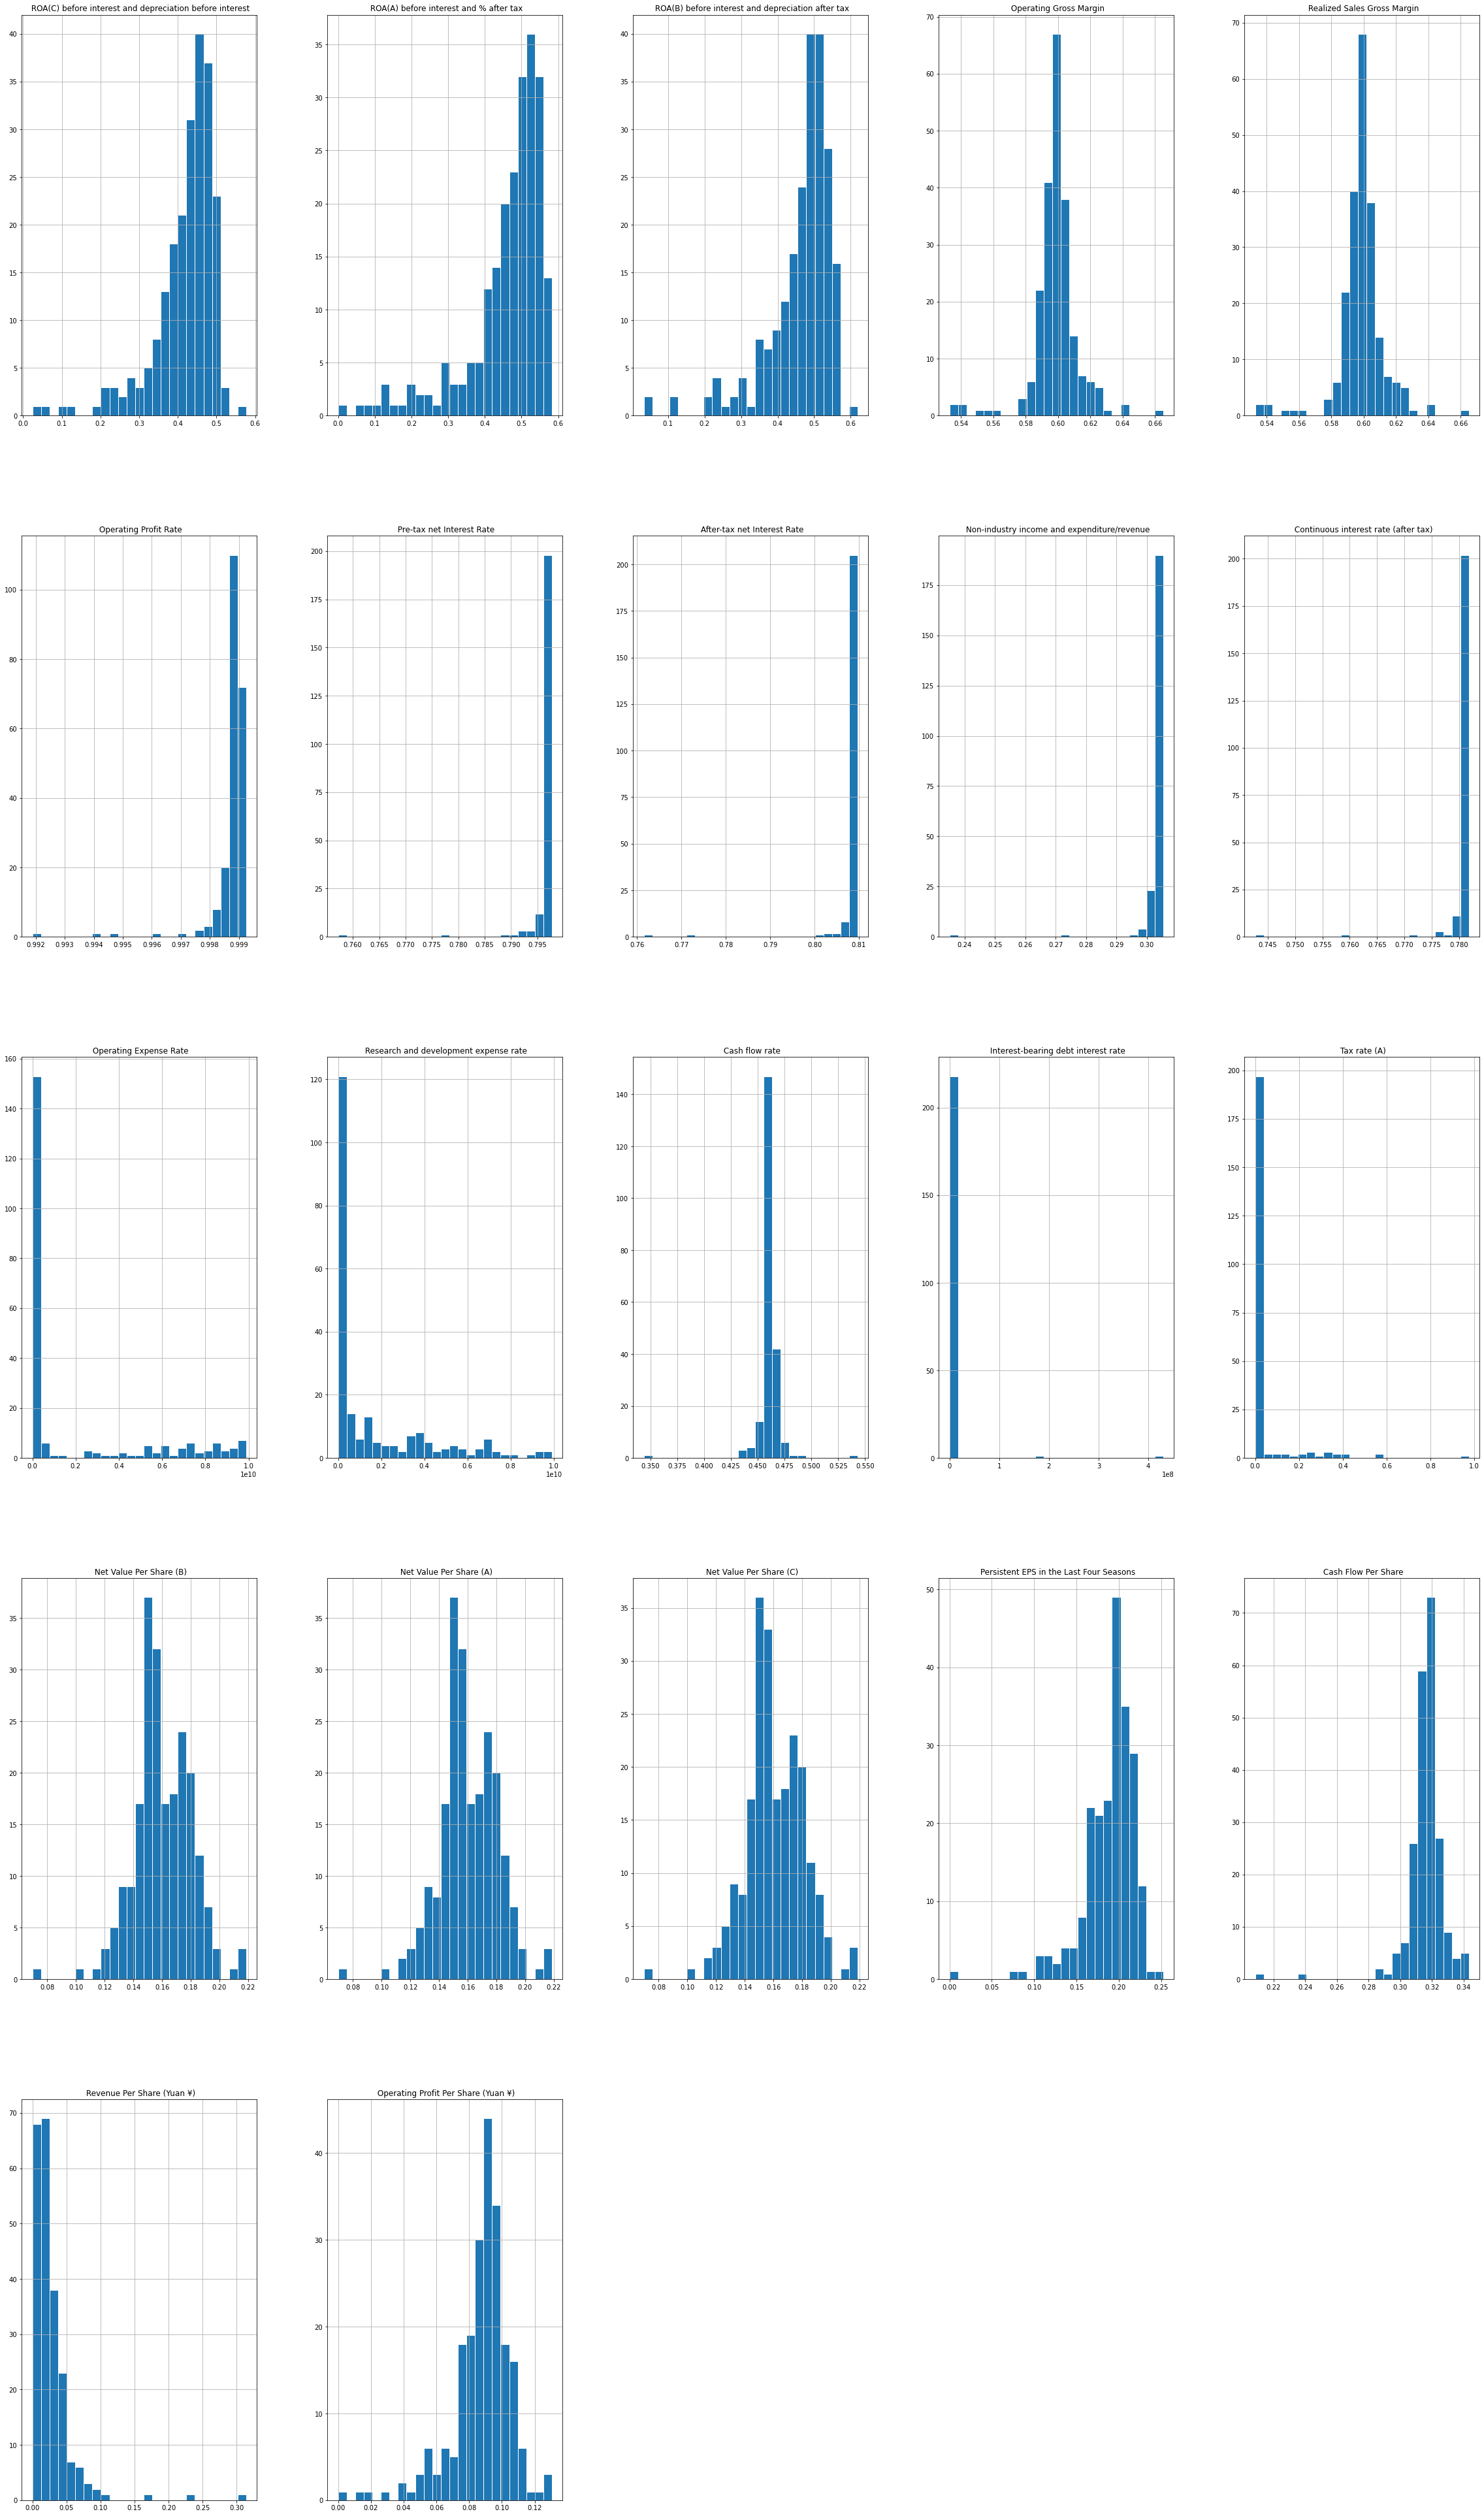

In [51]:

df[df['Bankrupt']==1].iloc[:,1:23].hist(figsize=(40,70), edgecolor='white',bins=25)
plt.show()

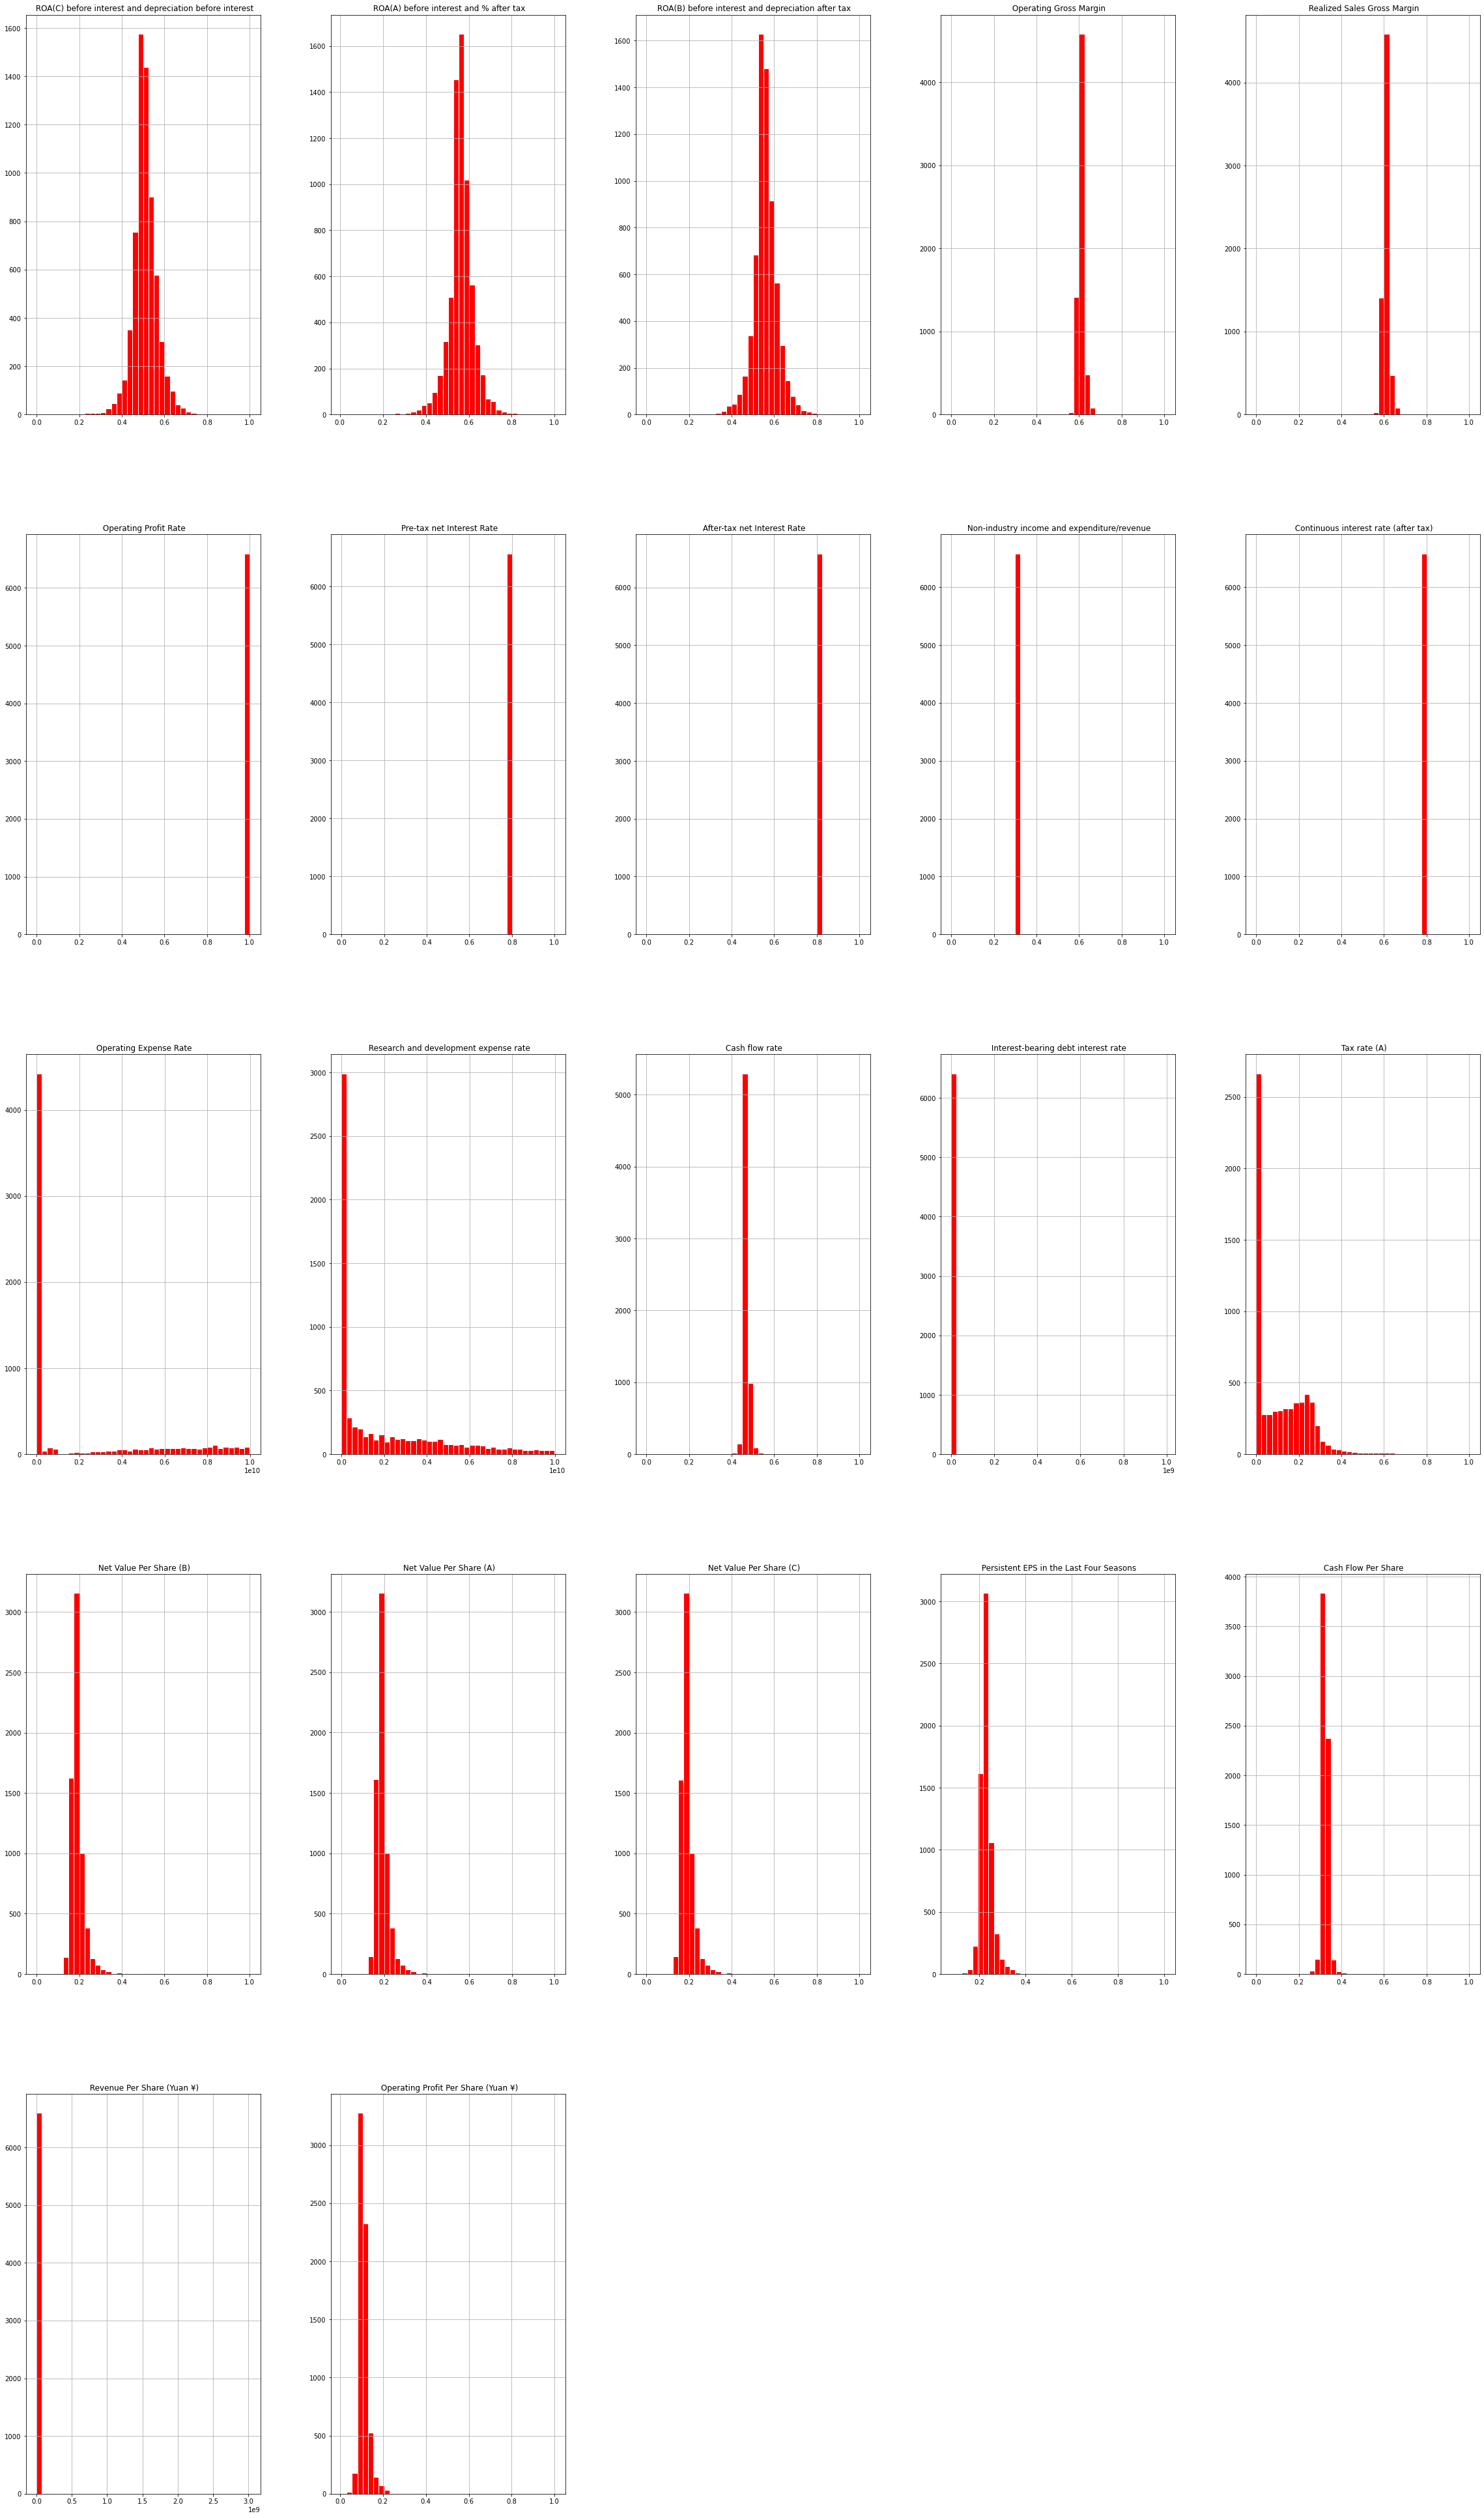

In [52]:
df[df['Bankrupt']==0].iloc[:,1:23].hist(figsize=(40,70), color='red',edgecolor='white',bins=40)
plt.show()

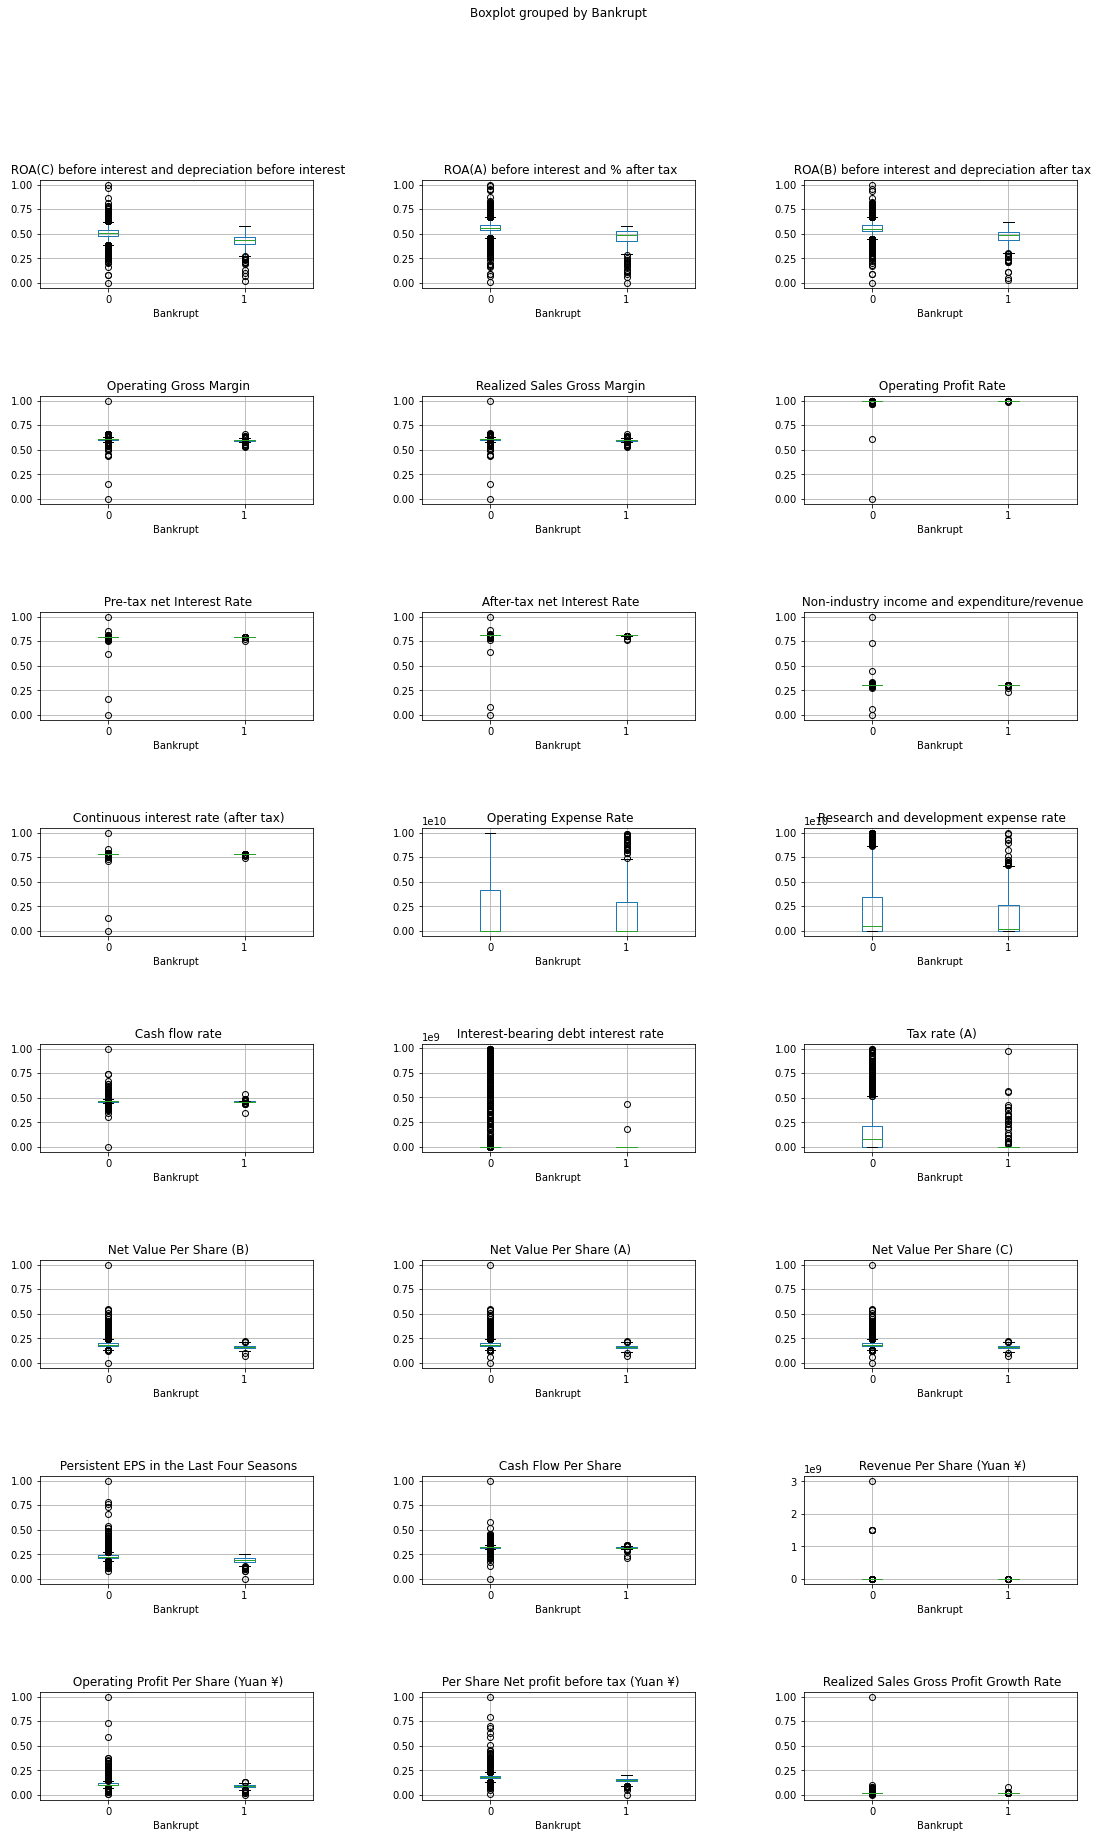

In [63]:
fig, axes = plt.subplots(8,3,figsize=(18,30)) # create figure and axes
for i,el in enumerate(list(df.columns.values)[1:25]):
    a = df.boxplot(el, by="Bankrupt", ax=axes.flatten()[i])
plt.subplots_adjust(hspace=1, wspace=0.4)
plt.show()

In [54]:
df1=df.copy()


In [55]:
df_new=df.iloc[:,0:23]

In [56]:
df_new.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥)
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.462746,0.000686,0.0,0.167502,0.167502,0.167502,0.212537,0.319162,0.029690,0.096898


In [57]:
df_new.shape

(6819, 23)

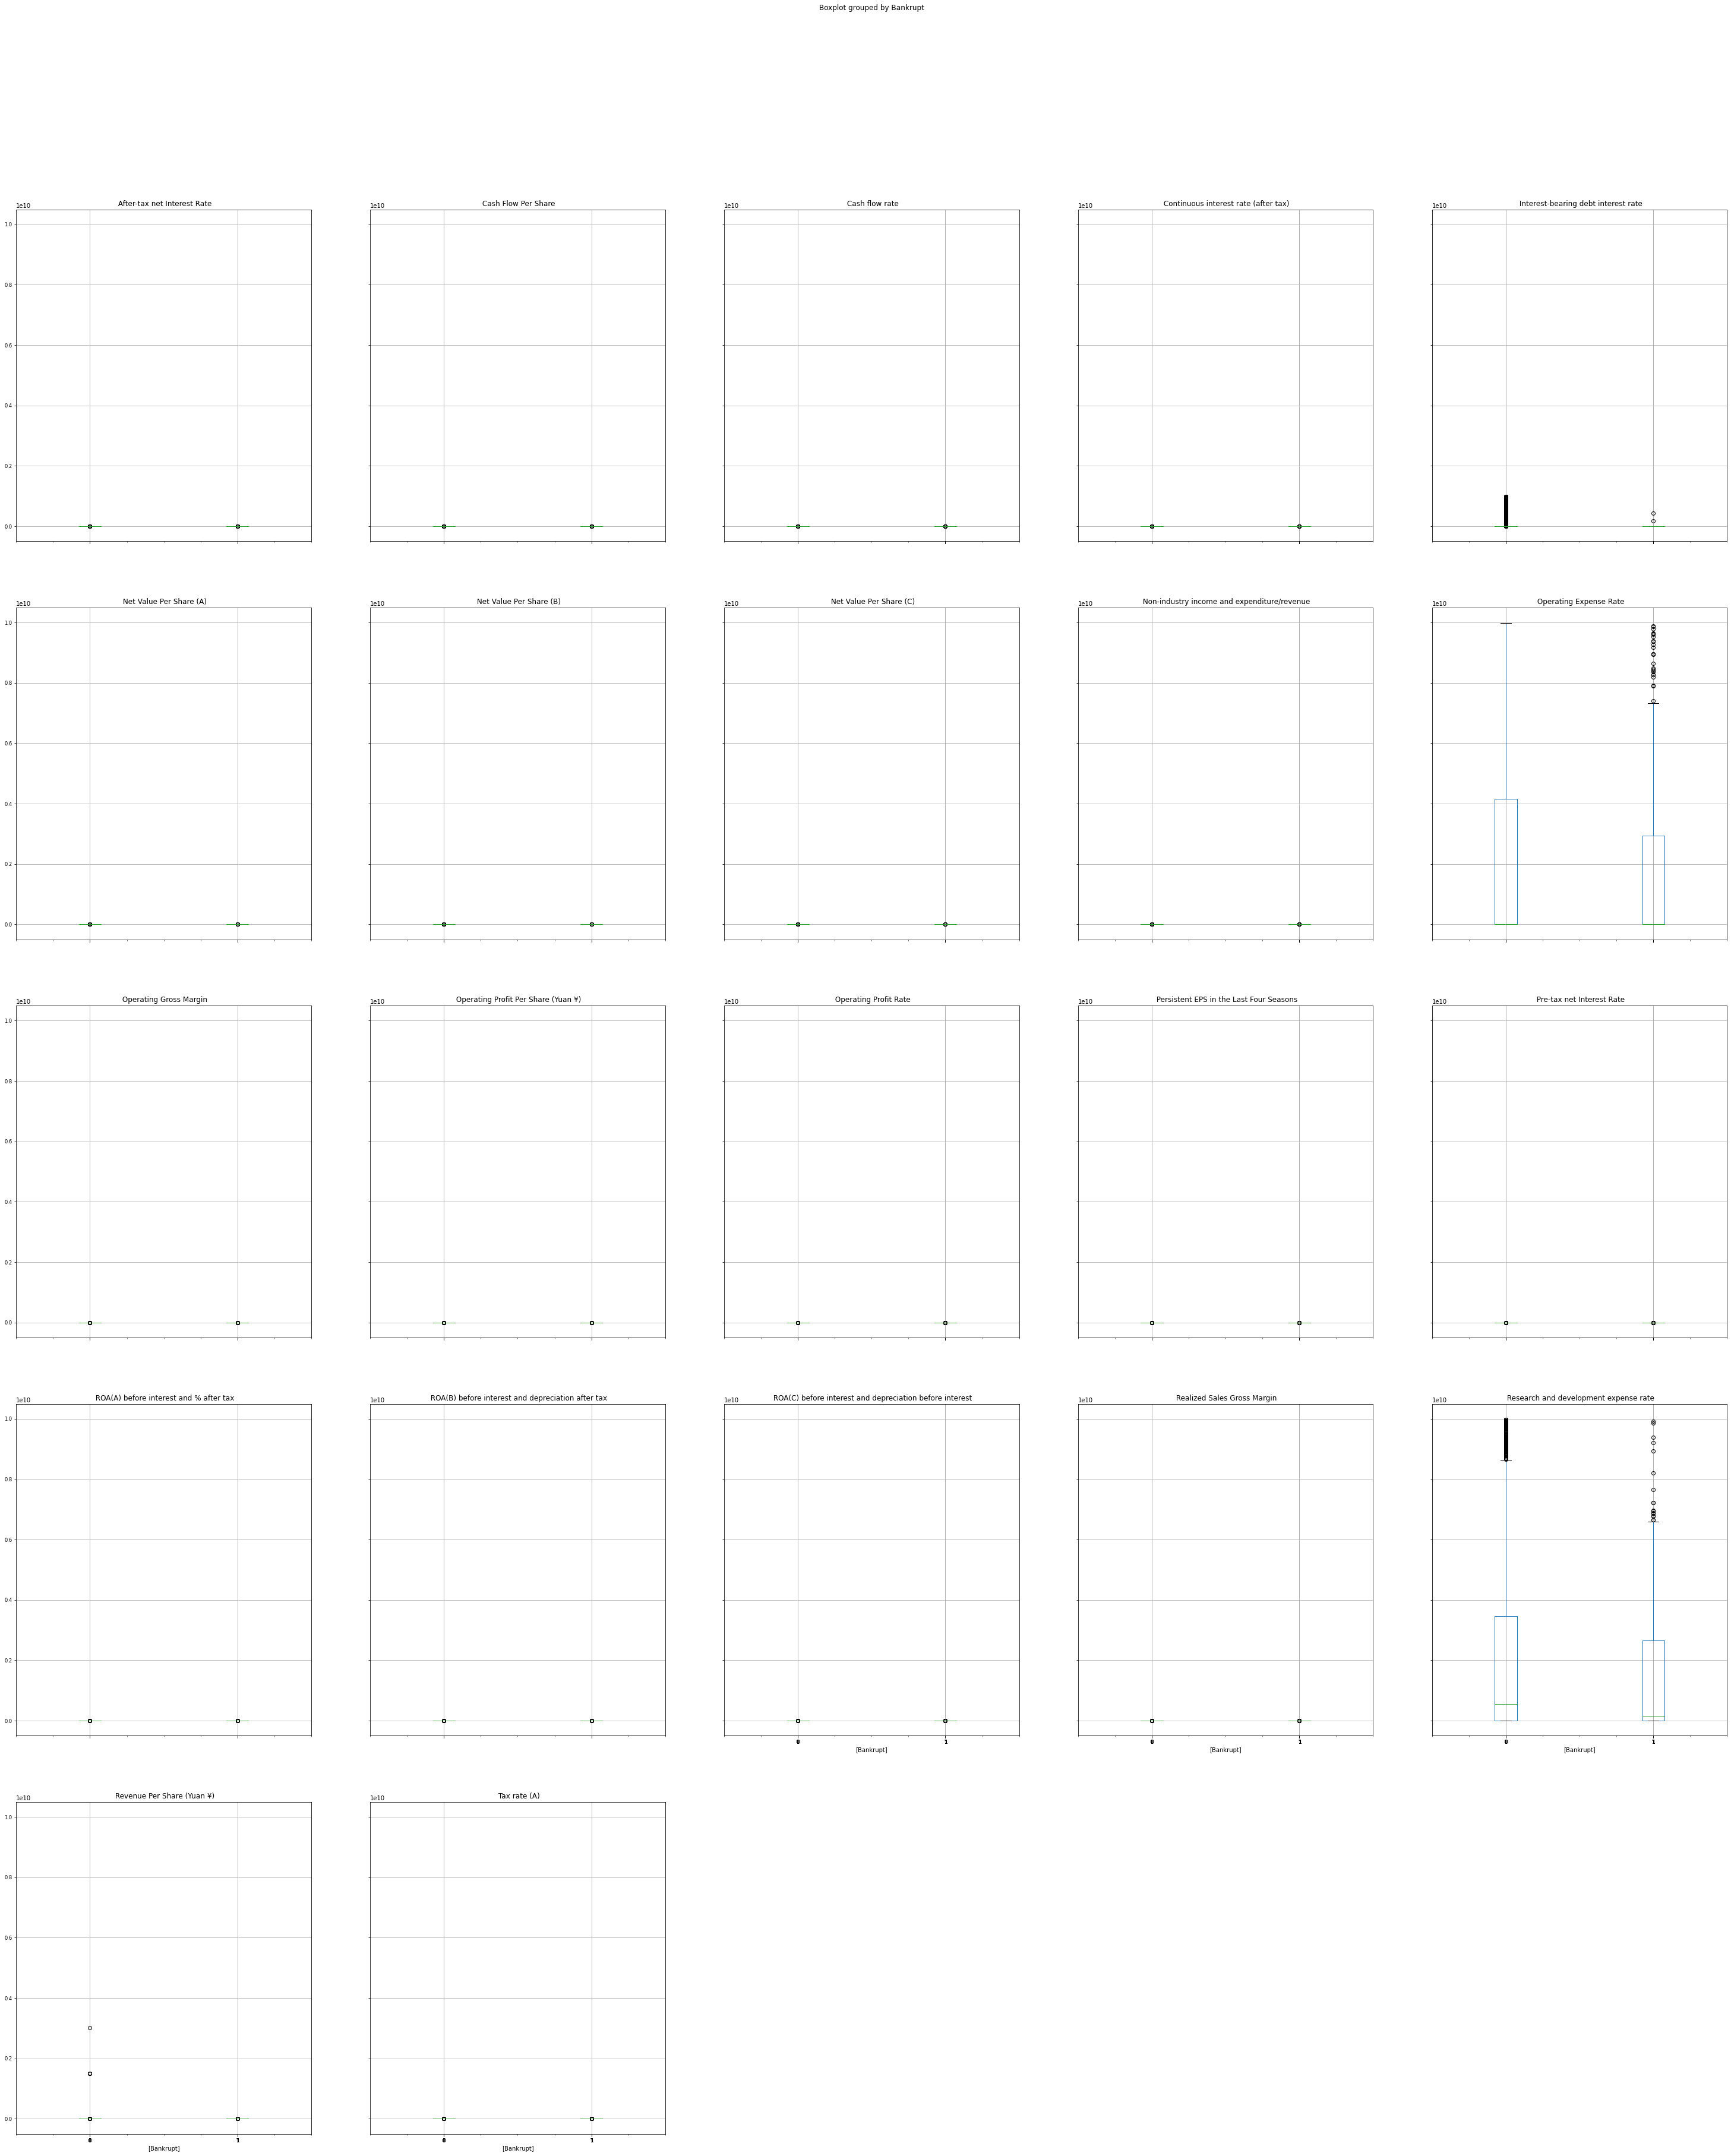

In [61]:


df_new.boxplot(by='Bankrupt',fontsize='small',figsize=(50,60))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
X = df_new.iloc[:,1:94]
Y = df_new.iloc[:,0]
over_sample=SMOTE()
df1, y_ros=over_sample.fit_resample(X,Y)

In [ ]:
df1 = (df1-df1.mean())/df1.std()

In [ ]:
y_ros

In [ ]:
df1['Bankrupt'] = y_ros
df1

In [ ]:
df1_freq=pd.DataFrame(df1['Bankrupt'].value_counts())
ax=sns.barplot(x=X_ros_freq.index,y='Bankrupt',data=df1_freq)
plt.xlabel('Bankruptcy')
plt.ylabel('Frequency')
print(df1['Bankrupt'].value_counts())

In [ ]:
def ptbi(x):
    y = df1.iloc[:,93]
    biser = stats.pointbiserialr(x, y)[0]
    return biser

In [ ]:
corr = []
for i in range(0, 93):
  x = df1.iloc[:,i]
  corr.append(ptbi(x))

In [ ]:
X = df1.iloc[:,0:93]
Y = df1.iloc[:,93]

In [ ]:
columns = list(X.columns)
biser_df = pd.DataFrame(columns,columns= ["Features"])
biser_df["PBC"] = corr
biser_df["ABS PBC"]=biser_df.iloc[:,1].abs()
biser_df.head(5)

In [ ]:
df2=biser_df.sort_values(by=['ABS PBC'], ascending=False)
df2.head(20)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
correlated_features = set()
col_no = set()
correlation_matrix = df1.drop('Bankrupt', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname) 
            col_no.add(i)

In [ ]:
correlated_features

In [ ]:
col_no

In [ ]:
df1 = df1.drop(df1.columns[[1,
 2,
 4,
 6,
 7,
 9,
 16,
 17,
 21,
 22,
 26,
 37,
 41,
 42,
 59,
 60,
 65,
 74,
 76,
 77,
 78,
 84,
 87,
 88,
 89]], axis=1)

In [ ]:
df1.head(3)

In [ ]:
X1 = df1.iloc[:,0:67]
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=4,cv=StratifiedKFold(4), scoring='precision')
rfecv.fit(X1,Y)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=1)
plt.show()

In [ ]:
rfe = RFE(estimator = rfc , n_features_to_select = 7 , step = 6)
rfe.fit(X1,Y)
rfe.support_

In [ ]:
features = set ()
for col in X1.columns:
    features.add(col)
    
features    

In [ ]:
df3 = pd.DataFrame(rfe.support_,features)
df3

In [ ]:
df3[df3.iloc[:,0] == True]

In [ ]:
print(np.where(rfe.support_ == False)[0])
X1.drop(X1.columns[np.where(rfe.support_ == False)[0]], axis=1 , inplace = True)

In [ ]:
rfe.estimator_.feature_importances_

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X1.columns
dset['importance'] = rfe.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFE - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()